In [1]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data2.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
#Are NaN in the dataset?
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [11]:
#Target column
y_name = "Bankrupt?"
#Column names - for shao values clarity
feature_names = df.drop(columns=[y_name]).columns

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_size = int(0.8 * len(df_shuffled))
df_train = df_shuffled.iloc[:train_size]
df_test = df_shuffled.iloc[train_size:]

# y and X 
if y_name in df.columns:
    y_train = df_train[y_name].values
    X_shap_train = df_train.drop(columns=[y_name])
    X_train = X_shap_train.values

    y_test = df_test[y_name].values
    X_shap_test = df_test.drop(columns=[y_name])
    X_test = X_shap_test.values

#Checking if everything is correct
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(type(X_test)) 
print(type(y_train))  


X_train shape: (5455, 95), y_train shape: (5455,)
X_test shape: (1364, 95), y_test shape: (1364,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(np.unique(y_train))  
print(np.unique(y_test))   

[0 1]
[0 1]


In [15]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from RandomForestShap import RandomForestShap
import shap

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


C:\Users\Vic\.conda\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
import time
from sklearn.ensemble import RandomForestClassifier

# Measures training time
def check_training_time(X_train, y_train):
    start_time = time.time()
    clf = RandomForestShap(n_trees=20)
    clf.fit(X_train, y_train)
    return time.time() - start_time

Czas trenowania przed: 992.94 s


In [ ]:
# Time before features removal
time_before = check_training_time(X_train, y_train)
print(f"Time before features removal: {time_before:.2f} s")


In [17]:
import time
import tracemalloc
from sklearn.metrics import accuracy_score

def measure_memonry_usage(model, X_train, y_train, X_test, y_test, call_number=1):
    print(f"\nCall number: {call_number}")

    tracemalloc.start()
    model.fit(X_train, y_train)
    current_train, peak_train = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    train_mem = peak_train / (1024 * 1024)

    #return metrics
    results = {
        "call_number": call_number,
        "train_memory_mb": round(train_mem, 4)
    }

    # Print results
    print(f"Memory usage during training:  {results['train_memory_mb']} MB" )

    return results


In [23]:
clf = RandomForestShap(n_trees=20)
results_all = []
i = 1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 1
Train: 2608.6398 s, 20.3029 MB | Predict: 0.1012 s, 0.4218 MB | Accuracy: 0.967


In [25]:
clf = RandomForestShap(n_trees=20)
results_all = []

In [17]:
import shap

# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [24:24,  1.08s/it]                          


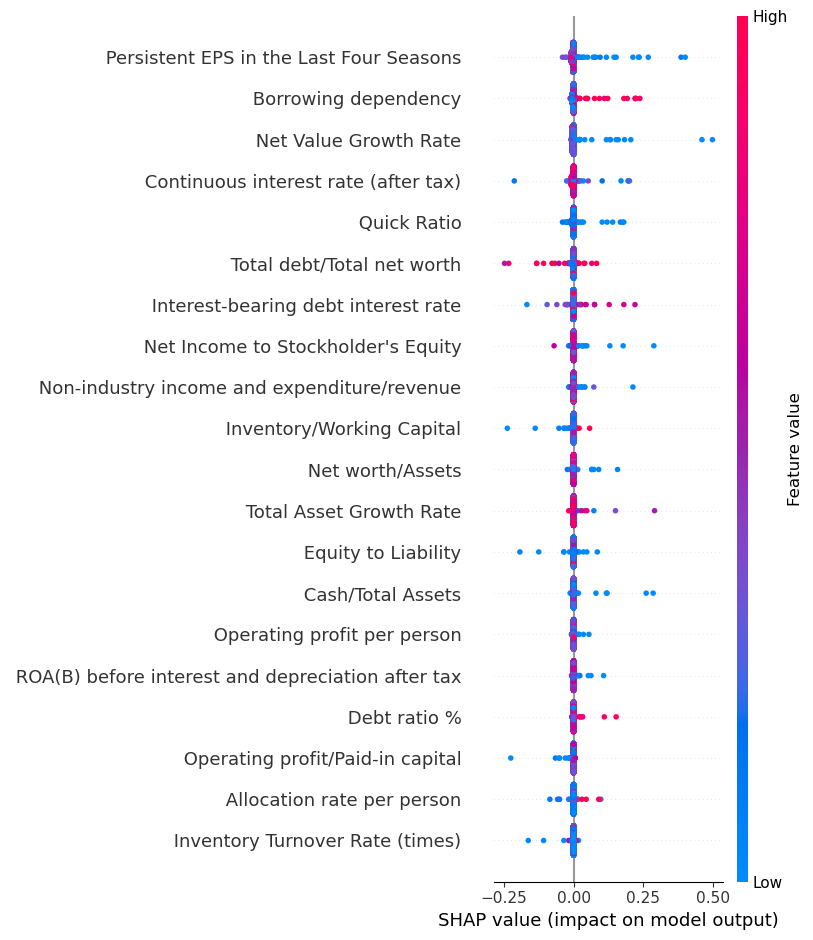

In [19]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [23]:
pd.set_option('display.max_rows', 1000)
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
18            Persistent EPS in the Last Four Seasons         0.005319
39                               Borrowing dependency         0.003259
29                              Net Value Growth Rate         0.003165
9                Continuous interest rate (after tax)         0.002806
33                                        Quick Ratio         0.002355
35                         Total debt/Total net worth         0.002141
13                Interest-bearing debt interest rate         0.001908
89                 Net Income to Stockholder's Equity         0.001395
8         Non-industry income and expenditure/revenue         0.001147
61                          Inventory/Working Capital         0.001140
37                                   Net worth/Assets         0.001054
28                            Total Asset Growth Rate         0.000882
94                                Equity to Liability         0.000867
56    

In [33]:
print(X_shap_test.columns)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [21]:
X_shap_test = X_shap_test.drop(columns=[' Operating Gross Margin'])

In [19]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Total assets to GNP price',' Cash flow rate', ' Long-term fund suitability ratio (A)',
' Current Liability to Liability', ' Cash Flow to Sales', ' Current Ratio', ' Operating Profit Rate', ' Operating Profit Growth Rate', 
' Current Liabilities/Equity', ' Working Capital to Total Assets', ' Contingent liabilities/Net worth', ' After-tax net Interest Rate',
' Cash Flow to Equity', ' Current Liability to Current Assets', ' Total Asset Turnover',' Tax rate (A)', ' Liability-Assets Flag', ' Net Income Flag'])
X_shap_train = X_shap_train.drop(columns=[' Operating Gross Margin',' Total assets to GNP price',' Cash flow rate', ' Long-term fund suitability ratio (A)',
' Current Liability to Liability', ' Cash Flow to Sales', ' Current Ratio', ' Operating Profit Rate', ' Operating Profit Growth Rate', 
' Current Liabilities/Equity', ' Working Capital to Total Assets', ' Contingent liabilities/Net worth', ' After-tax net Interest Rate',
' Cash Flow to Equity', ' Current Liability to Current Assets', ' Total Asset Turnover',' Tax rate (A)', ' Liability-Assets Flag', ' Net Income Flag'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [41]:
# Czas po usunięciem kolumny 1
time_after1 = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_after1:.2f} s")

Czas trenowania przed: 773.28 s


In [27]:
i =2
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 2
Train: 2216.7289 s, 15.6563 MB | Predict: 0.0944 s, 0.4218 MB | Accuracy: 0.9663


In [51]:
#Kolejna predykcja
clf = RandomForestShap(n_trees=20)
clf.fit(X_train, y_train)
predictions_2 = clf.predict(X_test)

acc =  accuracy(y_test, predictions_2)
print(acc)

0.969208211143695


In [61]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


Czas predykcji po: 0.04 s


In [63]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_2.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [27:42,  1.23s/it]                          


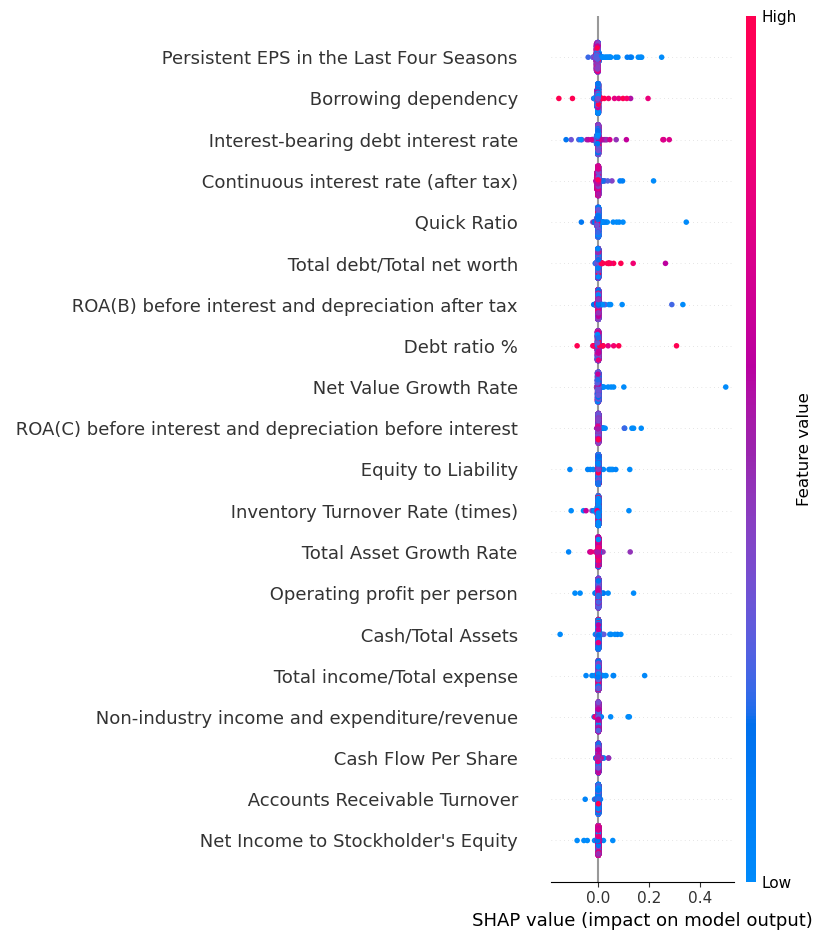

In [65]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [67]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
13            Persistent EPS in the Last Four Seasons         0.005294
31                               Borrowing dependency         0.002963
9                 Interest-bearing debt interest rate         0.002864
6                Continuous interest rate (after tax)         0.002179
26                                        Quick Ratio         0.002064
28                         Total debt/Total net worth         0.001712
2    ROA(B) before interest and depreciation after...         0.001595
29                                       Debt ratio %         0.001295
23                              Net Value Growth Rate         0.001202
0    ROA(C) before interest and depreciation befor...         0.000894
75                                Equity to Liability         0.000827
37                    Inventory Turnover Rate (times)         0.000769
22                            Total Asset Growth Rate         0.000761
41    

In [23]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Current Liability to Equity', ' Net Value Per Share (A)', ' Long-term Liability to Current Assets',
' Current Liability to Assets', ' Operating profit/Paid-in capital', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net worth/Assets',
' Liability to Equity' ])
X_shap_train = X_shap_train.drop(columns=[' Current Liability to Equity', ' Net Value Per Share (A)', ' Long-term Liability to Current Assets',
' Current Liability to Assets', ' Operating profit/Paid-in capital', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net worth/Assets',
' Liability to Equity' ])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [31]:
print(X_train.shape)  # Sprawdzamy rozmiar danych po usunięciu kolumn
print(X_test.shape)   # To samo dla danych testowych


(5455, 68)
(1364, 68)


In [33]:
i =3
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 3
Train: 1768.4912 s, 16.7953 MB | Predict: 0.0918 s, 0.4192 MB | Accuracy: 0.9648


In [73]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania po: {time_before:.2f} s")

Czas trenowania po: 700.47 s


In [69]:
#Kolejna predykcja
clf_3 = RandomForestShap(n_trees=20)
clf_3.fit(X_train, y_train)
predictions_3 = clf_3.predict(X_test)

acc =  accuracy(y_test, predictions_3)
print(acc)

0.9706744868035191


In [75]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


Czas predykcji po: 0.04 s


In [77]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_3.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [23:58,  1.06s/it]                          


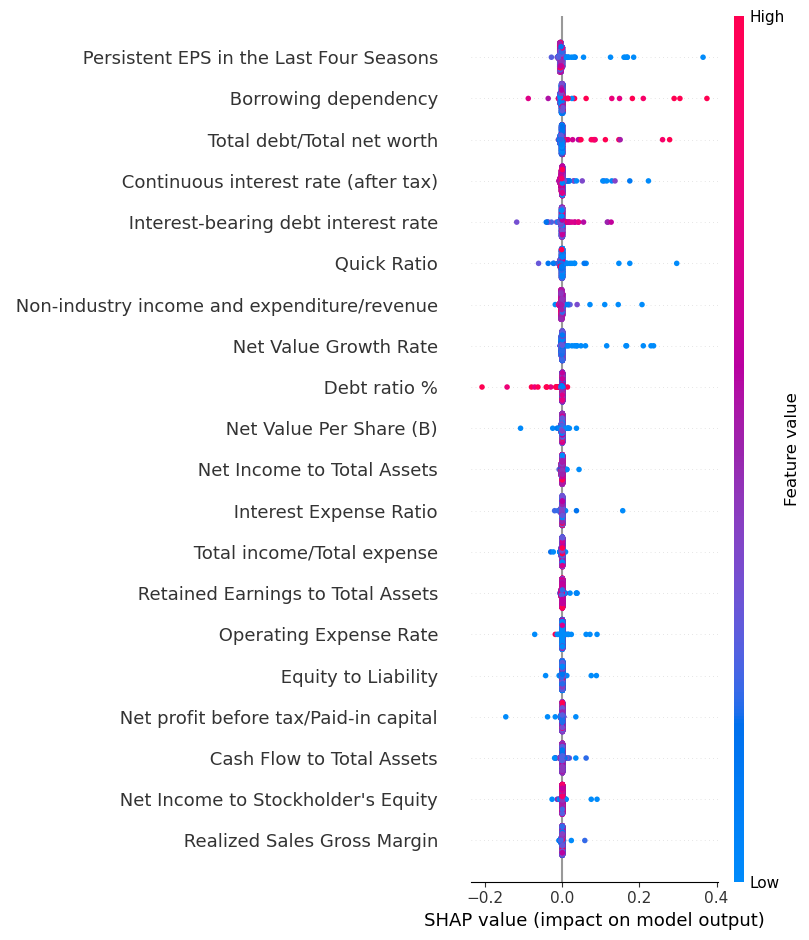

In [79]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [83]:
pd.set_option('display.max_rows', 1000)
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
12            Persistent EPS in the Last Four Seasons         0.004511
29                               Borrowing dependency         0.003121
27                         Total debt/Total net worth         0.002594
6                Continuous interest rate (after tax)         0.002466
9                 Interest-bearing debt interest rate         0.002187
25                                        Quick Ratio         0.002184
5         Non-industry income and expenditure/revenue         0.002147
22                              Net Value Growth Rate         0.001837
28                                       Debt ratio %         0.000934
10                            Net Value Per Share (B)         0.000857
62                         Net Income to Total Assets         0.000745
26                             Interest Expense Ratio         0.000655
51                         Total income/Total expense         0.000626
50    

In [25]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Fixed Assets to Assets', ' Cash Reinvestment %', ' Operating Profit Per Share (Yuan ¥)',
' Inventory/Current Liability', ' Average Collection Days', ' Quick Assets/Current Liability', ' Net Worth Turnover Rate (times)',  
' Working capitcal Turnover Rate', ' Pre-tax net Interest Rate'])
X_shap_train = X_shap_train.drop(columns=[' Fixed Assets to Assets', ' Cash Reinvestment %', ' Operating Profit Per Share (Yuan ¥)',
' Inventory/Current Liability', ' Average Collection Days', ' Quick Assets/Current Liability', ' Net Worth Turnover Rate (times)',  
' Working capitcal Turnover Rate', ' Pre-tax net Interest Rate'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [87]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 608.07 s


In [37]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 4
Train: 1508.3796 s, 12.4446 MB | Predict: 0.0898 s, 0.4192 MB | Accuracy: 0.9655


In [89]:
#Kolejna predykcja
clf_4 = RandomForestShap(n_trees=20)
clf_4.fit(X_train, y_train)
predictions_4 = clf_4.predict(X_test)

acc =  accuracy(y_test, predictions_4)
print(acc)

0.967008797653959


In [95]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


Czas predykcji po: 0.04 s


In [97]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_4.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [26:37,  1.18s/it]                          


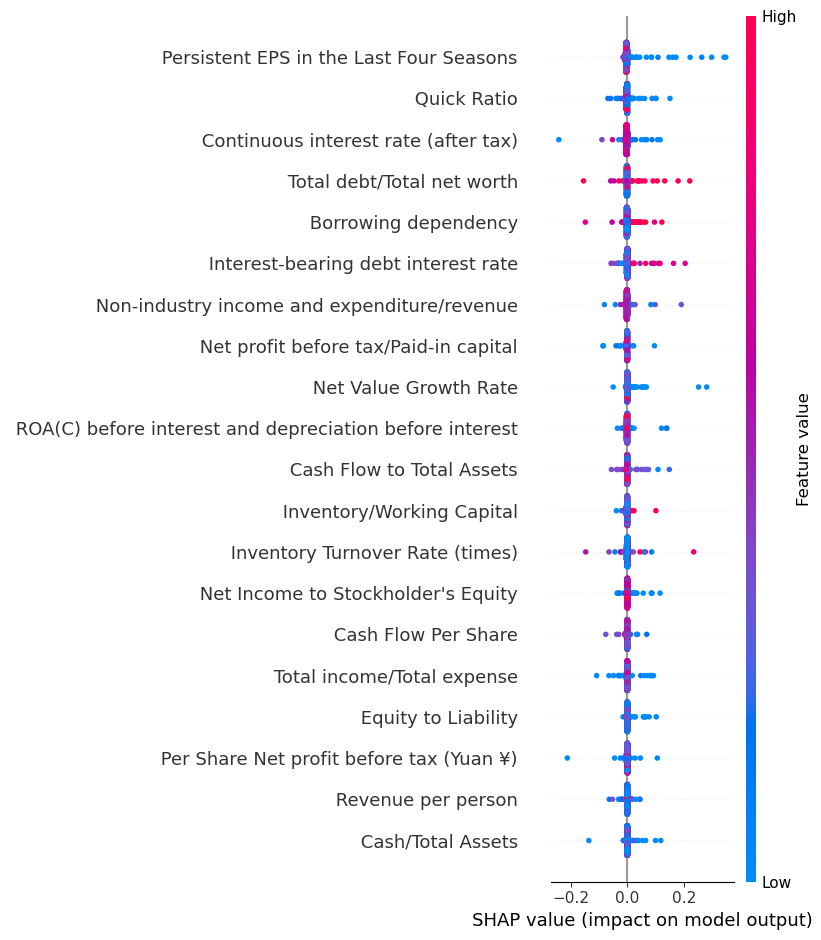

In [99]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [101]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
11            Persistent EPS in the Last Four Seasons         0.005067
22                                        Quick Ratio         0.002944
5                Continuous interest rate (after tax)         0.002569
24                         Total debt/Total net worth         0.002226
26                               Borrowing dependency         0.002034
8                 Interest-bearing debt interest rate         0.001908
4         Non-industry income and expenditure/revenue         0.001703
27              Net profit before tax/Paid-in capital         0.001478
20                              Net Value Growth Rate         0.001372
0    ROA(C) before interest and depreciation befor...         0.001326
50                          Cash Flow to Total Assets         0.001281
40                          Inventory/Working Capital         0.001263
30                    Inventory Turnover Rate (times)         0.001261
56    

In [27]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Gross Profit to Sales', ' Working Capital/Equity', ' Inventory and accounts receivable/Net value',
' Revenue Per Share (Yuan ¥)', ' Continuous Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Quick Asset Turnover Rate',
' Operating Expense Rate', ' Cash Flow to Liability', ' Current Asset Turnover Rate', ' Interest Expense Ratio', ' Equity to Long-term Liability',
' Fixed Assets Turnover Frequency', ' CFO to Assets', ' Current Assets/Total Assets', ' Realized Sales Gross Profit Growth Rate',
' ROA(A) before interest and % after tax', ' Debt ratio %'])
X_shap_train = X_shap_train.drop(columns=[' Gross Profit to Sales', ' Working Capital/Equity', ' Inventory and accounts receivable/Net value',
' Revenue Per Share (Yuan ¥)', ' Continuous Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Quick Asset Turnover Rate',
' Operating Expense Rate', ' Cash Flow to Liability', ' Current Asset Turnover Rate', ' Interest Expense Ratio', ' Equity to Long-term Liability',
' Fixed Assets Turnover Frequency', ' CFO to Assets', ' Current Assets/Total Assets', ' Realized Sales Gross Profit Growth Rate',
' ROA(A) before interest and % after tax', ' Debt ratio %'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [105]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 422.06 s


In [41]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 5
Train: 1072.25 s, 9.2515 MB | Predict: 0.0922 s, 0.4192 MB | Accuracy: 0.9699


In [107]:
#Kolejna predykcja
clf_5 = RandomForestShap(n_trees=20)
clf_5.fit(X_train, y_train)
predictions_5 = clf_5.predict(X_test)

acc =  accuracy(y_test, predictions_5)
print(acc)

0.968475073313783


In [113]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


Czas predykcji po: 0.04 s


In [115]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_5.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [27:13,  1.20s/it]                          


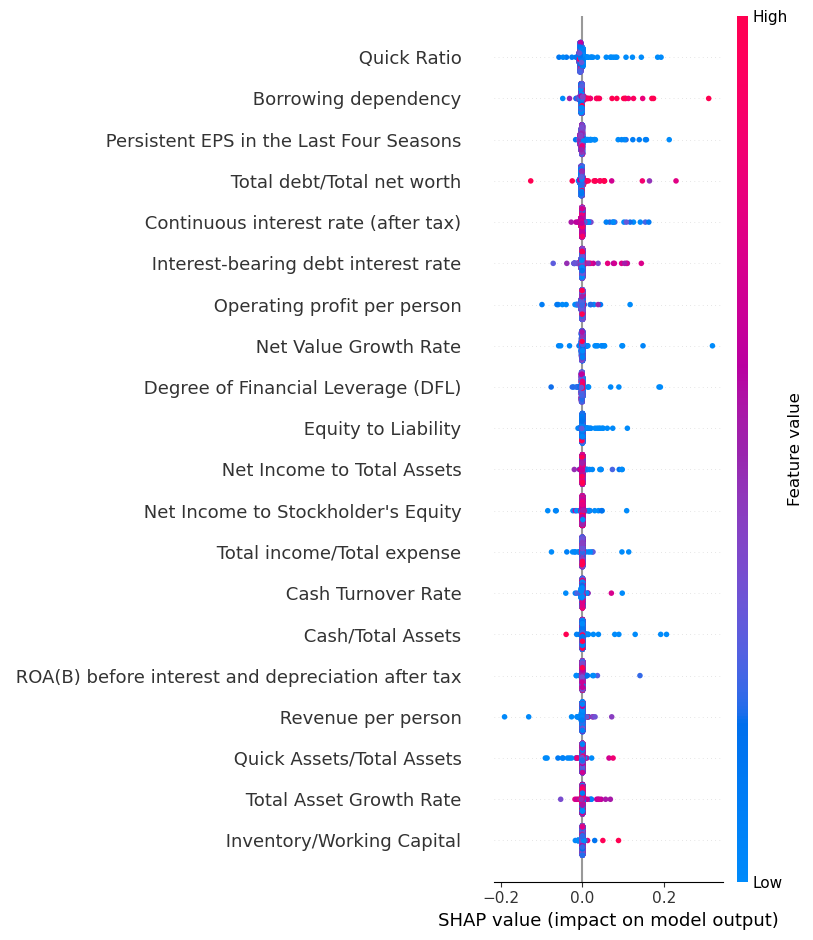

In [117]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [119]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
16                                        Quick Ratio         0.004608
18                               Borrowing dependency         0.003529
9             Persistent EPS in the Last Four Seasons         0.003382
17                         Total debt/Total net worth         0.002789
4                Continuous interest rate (after tax)         0.002481
6                 Interest-bearing debt interest rate         0.001769
23                        Operating profit per person         0.001516
14                              Net Value Growth Rate         0.001452
39                 Degree of Financial Leverage (DFL)         0.001401
40                                Equity to Liability         0.001140
36                         Net Income to Total Assets         0.001084
38                 Net Income to Stockholder's Equity         0.000910
32                         Total income/Total expense         0.000890
34    

In [29]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Net Value Per Share (B)', ' Cash Flow to Total Assets', ' Allocation rate per person',
' No-credit Interval', ' Accounts Receivable Turnover', ' Cash Flow Per Share', ' Total expense/Assets', ' Current Liabilities/Liability',
' Realized Sales Gross Margin', ' Research and development expense rate', ' Operating Funds to Liability', ' Cash/Current Liability',
' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Return Growth Rate Ratio', ' After-tax Net Profit Growth Rate'])
X_shap_train = X_shap_train.drop(columns=[' Net Value Per Share (B)', ' Cash Flow to Total Assets', ' Allocation rate per person',
' No-credit Interval', ' Accounts Receivable Turnover', ' Cash Flow Per Share', ' Total expense/Assets', ' Current Liabilities/Liability',
' Realized Sales Gross Margin', ' Research and development expense rate', ' Operating Funds to Liability', ' Cash/Current Liability',
' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Return Growth Rate Ratio', ' After-tax Net Profit Growth Rate'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [45]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 6
Train: 676.0753 s, 5.8235 MB | Predict: 0.0951 s, 0.4192 MB | Accuracy: 0.9685


In [123]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 266.27 s


In [125]:
#Kolejna predykcja
clf_6 = RandomForestShap(n_trees=20)
clf_6.fit(X_train, y_train)
predictions_6 = clf_6.predict(X_test)

acc =  accuracy(y_test, predictions_6)
print(acc)

0.9655425219941349


In [129]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


Czas predykcji po: 0.04 s


In [133]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_6.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [24:54,  1.10s/it]                          


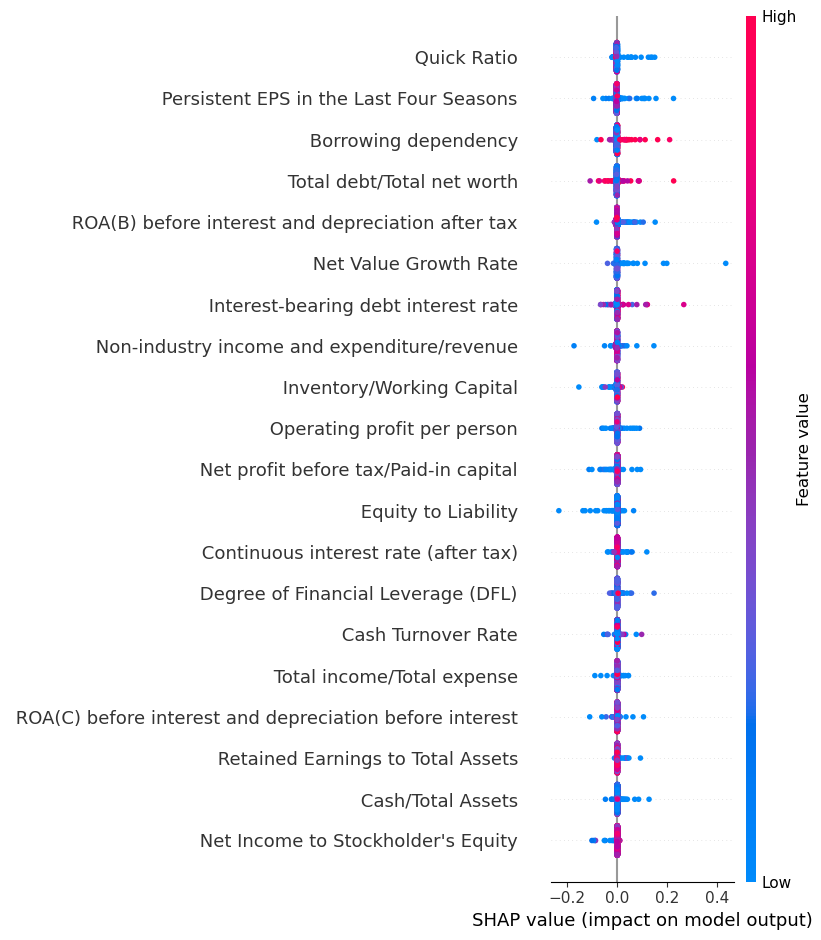

In [135]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [137]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
8                                         Quick Ratio         0.003452
5             Persistent EPS in the Last Four Seasons         0.003391
10                               Borrowing dependency         0.003079
9                          Total debt/Total net worth         0.002837
1    ROA(B) before interest and depreciation after...         0.002522
7                               Net Value Growth Rate         0.002507
4                 Interest-bearing debt interest rate         0.002408
2         Non-industry income and expenditure/revenue         0.001968
17                          Inventory/Working Capital         0.001736
14                        Operating profit per person         0.001561
11              Net profit before tax/Paid-in capital         0.001424
24                                Equity to Liability         0.001397
3                Continuous interest rate (after tax)         0.001209
23    

In [31]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Total income/Total expense', ' ROA(C) before interest and depreciation before interest',
' Retained Earnings to Total Assets', ' Cash/Total Assets', ' Net Income to Stockholder\'s Equity', ' Quick Assets/Total Assets', 
' Total Asset Growth Rate', ' Inventory Turnover Rate (times)', ' Net Income to Total Assets', ' Revenue per person'])
X_shap_train = X_shap_train.drop(columns=[' Total income/Total expense', ' ROA(C) before interest and depreciation before interest',
' Retained Earnings to Total Assets', ' Cash/Total Assets', ' Net Income to Stockholder\'s Equity', ' Quick Assets/Total Assets', 
' Total Asset Growth Rate', ' Inventory Turnover Rate (times)', ' Net Income to Total Assets', ' Revenue per person'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [51]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 7
Train: 394.2666 s, 3.7349 MB | Predict: 0.0953 s, 0.4192 MB | Accuracy: 0.9663


In [141]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 151.06 s


In [143]:
#Kolejna predykcja
clf_6 = RandomForestShap(n_trees=20)
clf_6.fit(X_train, y_train)
predictions_6 = clf_6.predict(X_test)

acc =  accuracy(y_test, predictions_6)
print(acc)

0.967008797653959


In [147]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_6.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [28:13,  1.25s/it]                          


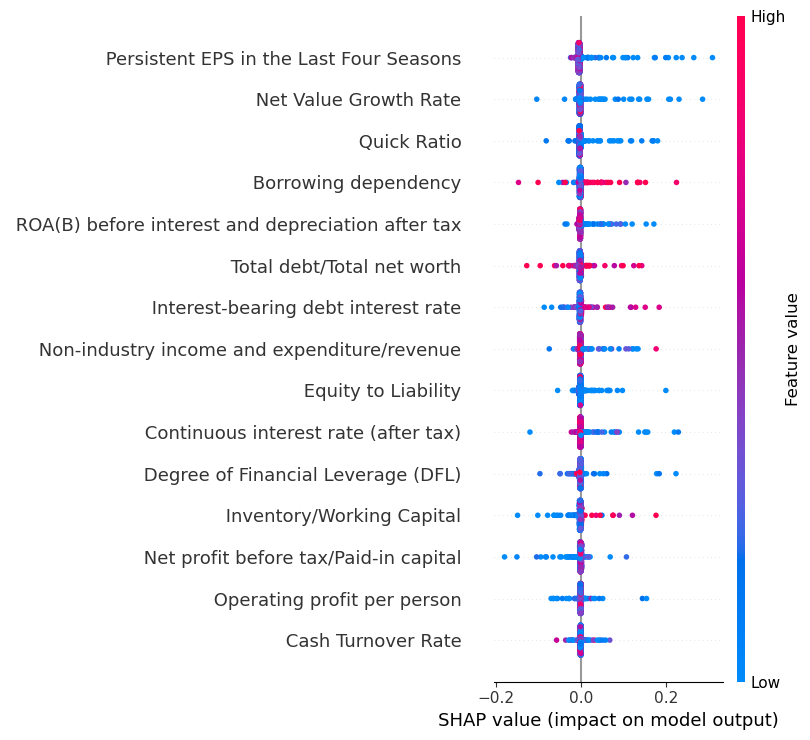

In [149]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [151]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                              Feature  Mean SHAP value
4             Persistent EPS in the Last Four Seasons         0.006297
5                               Net Value Growth Rate         0.003739
6                                         Quick Ratio         0.003445
8                                Borrowing dependency         0.003115
0    ROA(B) before interest and depreciation after...         0.003073
7                          Total debt/Total net worth         0.002677
3                 Interest-bearing debt interest rate         0.002668
1         Non-industry income and expenditure/revenue         0.002649
14                                Equity to Liability         0.002543
2                Continuous interest rate (after tax)         0.002540
13                 Degree of Financial Leverage (DFL)         0.002252
11                          Inventory/Working Capital         0.002014
9               Net profit before tax/Paid-in capital         0.001683
10    

In [33]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Degree of Financial Leverage (DFL)', ' Inventory/Working Capital', ' Net profit before tax/Paid-in capital',
' Operating profit per person', ' Cash Turnover Rate'])
X_shap_train = X_shap_train.drop(columns=[' Degree of Financial Leverage (DFL)', ' Inventory/Working Capital', ' Net profit before tax/Paid-in capital',
' Operating profit per person', ' Cash Turnover Rate'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [55]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 8
Train: 244.351 s, 2.5523 MB | Predict: 0.0926 s, 0.4192 MB | Accuracy: 0.9655


In [155]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 93.48 s


In [157]:
#Kolejna predykcja
clf_6 = RandomForestShap(n_trees=20)
clf_6.fit(X_train, y_train)
predictions_6 = clf_6.predict(X_test)

acc =  accuracy(y_test, predictions_6)
print(acc)

0.9699413489736071


In [159]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_6.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [25:19,  1.12s/it]                          


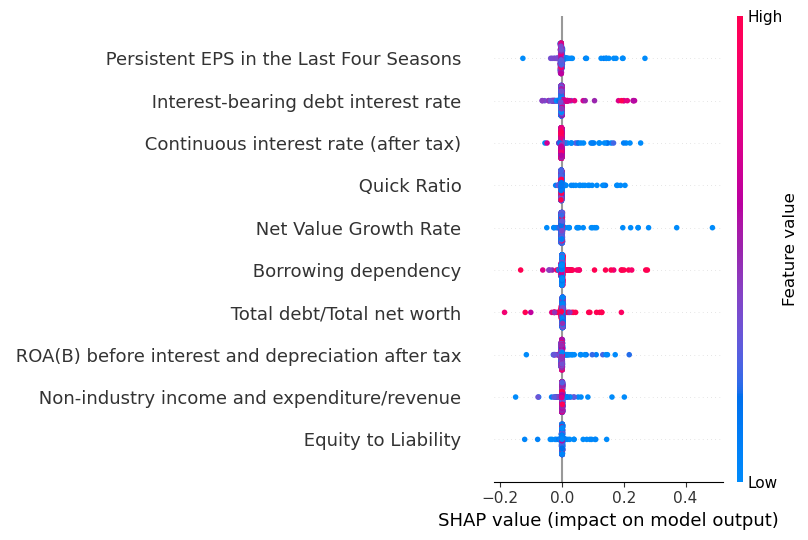

In [161]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [163]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                             Feature  Mean SHAP value
4            Persistent EPS in the Last Four Seasons         0.004476
3                Interest-bearing debt interest rate         0.004343
2               Continuous interest rate (after tax)         0.004134
6                                        Quick Ratio         0.003694
5                              Net Value Growth Rate         0.003314
8                               Borrowing dependency         0.003281
7                         Total debt/Total net worth         0.002700
0   ROA(B) before interest and depreciation after...         0.002311
1        Non-industry income and expenditure/revenue         0.001402
9                                Equity to Liability         0.001333


In [35]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Total debt/Total net worth', ' ROA(B) before interest and depreciation after tax',
' Non-industry income and expenditure/revenue', ' Equity to Liability'])
X_shap_train = X_shap_train.drop(columns=[' Total debt/Total net worth', ' ROA(B) before interest and depreciation after tax',
' Non-industry income and expenditure/revenue', ' Equity to Liability'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [59]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 9
Train: 137.1869 s, 1.9462 MB | Predict: 0.0981 s, 0.4192 MB | Accuracy: 0.9729


In [167]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 51.95 s


In [169]:
#Kolejna predykcja
clf_7 = RandomForestShap(n_trees=20)
clf_7.fit(X_train, y_train)
predictions_7 = clf_7.predict(X_test)

acc =  accuracy(y_test, predictions_7)
print(acc)

0.9706744868035191


In [171]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_7.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [25:52,  1.14s/it]                          


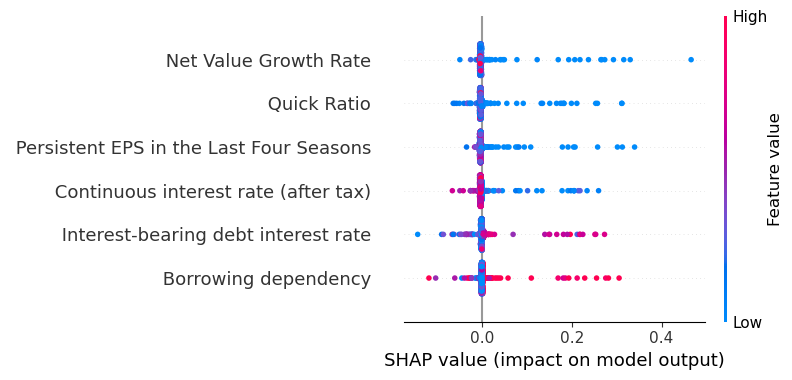

In [173]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [175]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                    Feature  Mean SHAP value
3                     Net Value Growth Rate         0.005582
4                               Quick Ratio         0.005210
2   Persistent EPS in the Last Four Seasons         0.004957
0      Continuous interest rate (after tax)         0.004724
1       Interest-bearing debt interest rate         0.003980
5                      Borrowing dependency         0.003230


In [37]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Interest-bearing debt interest rate', ' Borrowing dependency'])
X_shap_train = X_shap_train.drop(columns=[' Interest-bearing debt interest rate', ' Borrowing dependency'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [63]:
i +=1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 10
Train: 108.7503 s, 1.9869 MB | Predict: 0.103 s, 0.4192 MB | Accuracy: 0.9619


In [181]:
#Kolejna predykcja
clf_8 = RandomForestShap(n_trees=20)
clf_8.fit(X_train, y_train)
predictions_8 = clf_8.predict(X_test)

acc =  accuracy(y_test, predictions_8)
print(acc)

0.9648093841642229


In [183]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 40.10 s


In [185]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_8.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 1365it [28:21,  1.25s/it]                          


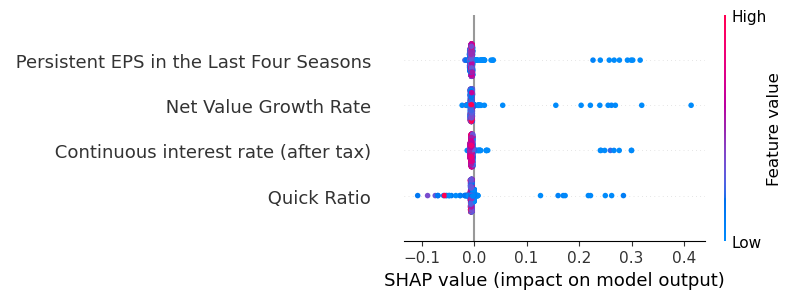

In [187]:
  feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [189]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

                                    Feature  Mean SHAP value
1   Persistent EPS in the Last Four Seasons         0.007335
2                     Net Value Growth Rate         0.007054
0      Continuous interest rate (after tax)         0.006650
3                               Quick Ratio         0.006353


In [39]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Continuous interest rate (after tax)', ' Quick Ratio'])
X_shap_train = X_shap_train.drop(columns=[' Continuous interest rate (after tax)', ' Quick Ratio'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [197]:
# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")

Czas trenowania przed: 17.03 s


In [43]:
clf = RandomForestShap(n_trees=20)
results_all = []
i = 1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 1
Train: 46.3062 s, 1.5637 MB | Predict: 0.1126 s, 0.4218 MB | Accuracy: 0.9619


In [233]:
#Kolejna predykcja
clf_9 = RandomForestShap(n_trees=20)
clf_9.fit(X_train, y_train)
predictions_9 = clf_9.predict(X_test)

acc =  accuracy(y_test, predictions_9)
print(acc)

0.9633431085043989


In [235]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_9.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


DimensionError: The passed data does not match the background shape expected by the masker! The data of shape (3,) was passed while the masker expected data of shape (2,).

In [45]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=[' Net Value Growth Rate'])
X_shap_train = X_shap_train.drop(columns=[' Net Value Growth Rate'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [47]:
i += 1
result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
results_all.append(result)


📦 Wywołanie nr 2
Train: 11.2322 s, 1.5577 MB | Predict: 0.1099 s, 0.4192 MB | Accuracy: 0.9648


In [203]:
#Kolejna predykcja
clf_9 = RandomForestShap(n_trees=20)
clf_9.fit(X_train, y_train)
predictions_9 = clf_9.predict(X_test)

acc =  accuracy(y_test, predictions_9)
print(acc)

0.9648093841642229
